In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('electricity_cost_dataset.csv')

In [56]:
df_new=df.copy()

In [57]:
df

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0
...,...,...,...,...,...,...,...,...,...
9995,708,Commercial,1365.0,76,77,22,23,0,885.0
9996,2960,Residential,3332.0,22,72,100,47,54,3081.0
9997,3942,Commercial,2427.0,61,43,48,49,0,3325.0
9998,3211,Commercial,4639.0,72,73,105,55,0,2892.0


In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.isna().sum()

site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

In [60]:
df.describe()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


In [61]:
df['structure type'].value_counts()

structure type
Residential    3939
Commercial     3005
Mixed-use      2052
Industrial     1004
Name: count, dtype: int64

onehot encoding

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
onehot=OneHotEncoder(drop='first',sparse_output=False)
onehot.fit(df[['structure type']])

OneHotEncoder(drop='first', sparse_output=False)

In [64]:
df["structure type"].value_counts()

structure type
Residential    3939
Commercial     3005
Mixed-use      2052
Industrial     1004
Name: count, dtype: int64

In [65]:
onehot.transform([['Commercial']])

c:\Users\SHAMIL JOLLY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 0.]])

In [66]:
dummy=df_new.loc[df_new['structure type']!="Industrial"]

In [ ]:
df=pd.get_dummies(df,columns=['structure type'],drop_first=True,dtype=int)

In [69]:
df

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519.0,69,52,188,1,72,1420.0,0,1,0
1,4272,2324.0,50,76,165,65,261,3298.0,0,1,0
2,3592,2701.0,20,94,198,39,117,3115.0,0,1,0
3,966,1000.0,13,60,74,3,35,1575.0,0,0,1
4,4926,5990.0,23,65,32,57,185,4301.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,708,1365.0,76,77,22,23,0,885.0,0,0,0
9996,2960,3332.0,22,72,100,47,54,3081.0,0,0,1
9997,3942,2427.0,61,43,48,49,0,3325.0,0,0,0
9998,3211,4639.0,72,73,105,55,0,2892.0,0,0,0


outliers

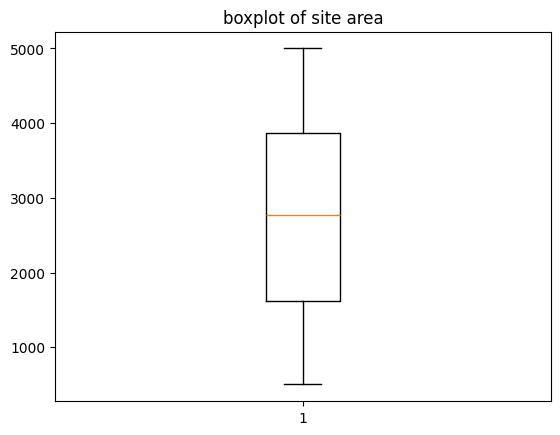

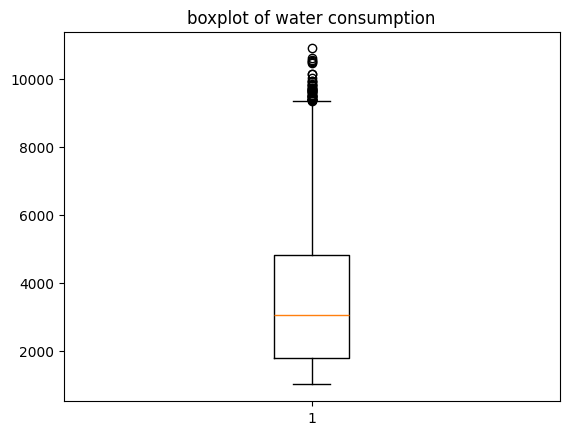

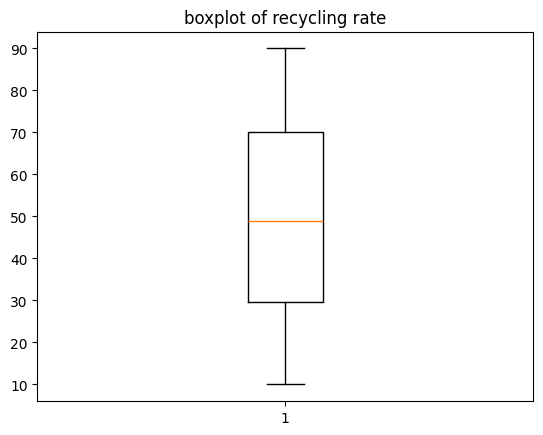

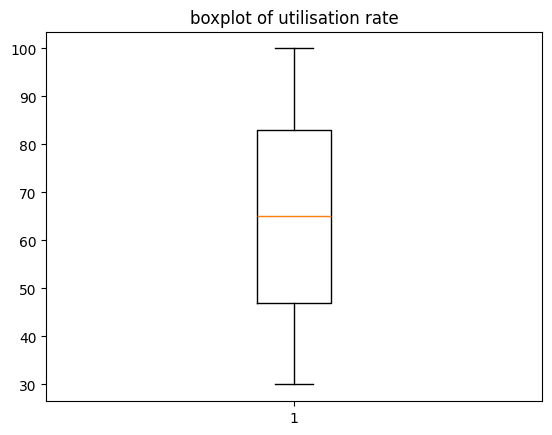

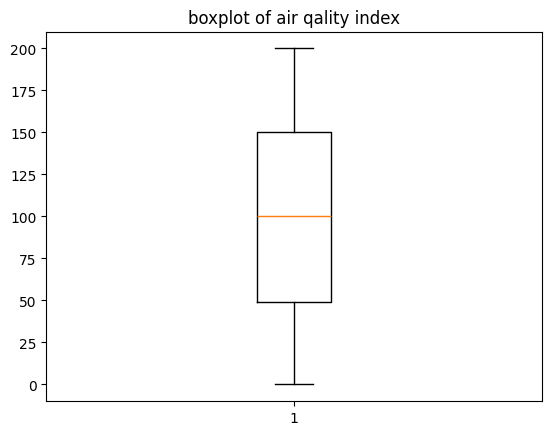

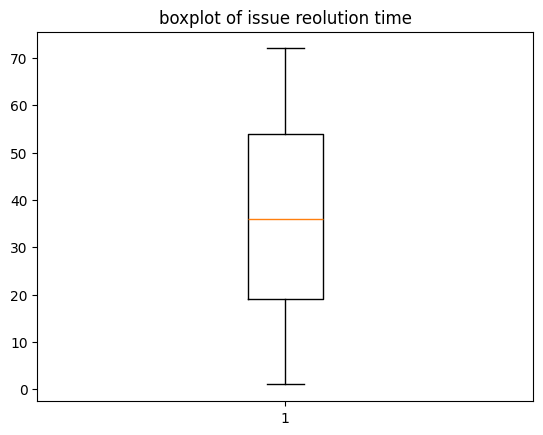

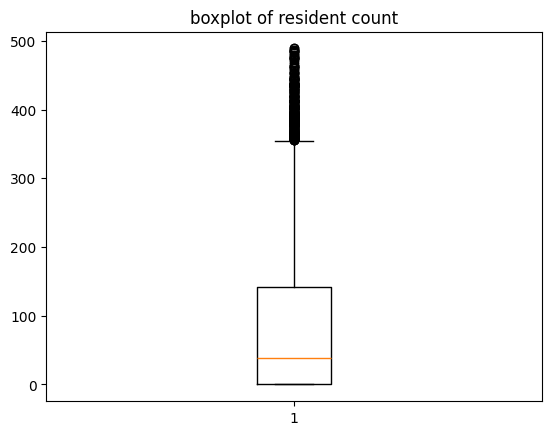

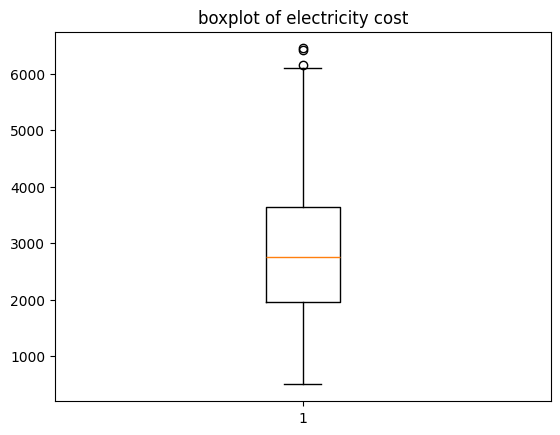

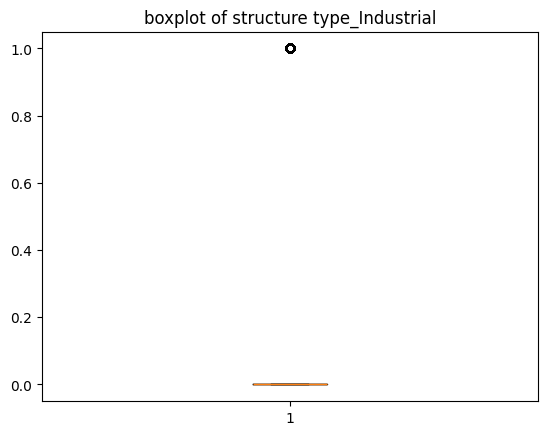

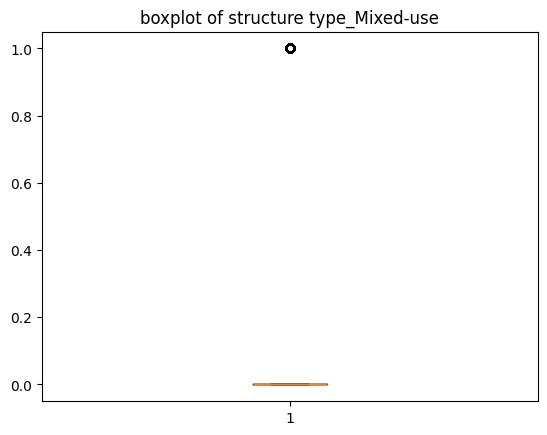

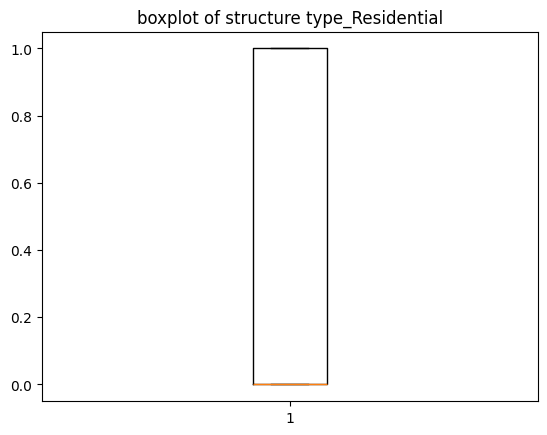

In [70]:
for i in df:
    if df[i].dtype in ['int','float']:
        plt.boxplot(df[i])
        plt.title(f"boxplot of {i}")
        plt.show()

In [71]:
df['water consumption'].describe()

count    10000.000000
mean      3494.057100
std       2076.181117
min       1000.000000
25%       1779.000000
50%       3047.500000
75%       4811.000000
max      10894.000000
Name: water consumption, dtype: float64

In [72]:
df['resident count'].describe()

count    10000.000000
mean        85.573100
std        107.876179
min          0.000000
25%          0.000000
50%         39.000000
75%        142.000000
max        489.000000
Name: resident count, dtype: float64

In [73]:
q1=df['water consumption'].quantile(0.25)
q3=df['water consumption'].quantile(0.75)
iqr=q3-q1
q3+1.5*iqr

np.float64(9359.0)

In [74]:
df.loc[df['water consumption']>9359,'electricity cost'].count()

np.int64(43)

In [75]:
q1=df['resident count'].quantile(0.25)
q3=df['resident count'].quantile(0.75)
iqr=q3-q1
q3+1.5*iqr

np.float64(355.0)

In [76]:
df.loc[df['resident count']>355,'electricity cost'].count()

np.int64(289)

In [77]:
df['electricity cost'].count()

np.int64(10000)

In [78]:
df=df.loc[df['water consumption']<=9359]

In [79]:
df=df.loc[df['resident count']<=355]

In [80]:
x=df.drop(columns='electricity cost')
y=df['electricity cost']

In [81]:
x

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519.0,69,52,188,1,72,0,1,0
1,4272,2324.0,50,76,165,65,261,0,1,0
2,3592,2701.0,20,94,198,39,117,0,1,0
3,966,1000.0,13,60,74,3,35,0,0,1
4,4926,5990.0,23,65,32,57,185,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,708,1365.0,76,77,22,23,0,0,0,0
9996,2960,3332.0,22,72,100,47,54,0,0,1
9997,3942,2427.0,61,43,48,49,0,0,0,0
9998,3211,4639.0,72,73,105,55,0,0,0,0


splitting

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

scaling

In [83]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_train_scaled=minmax.fit_transform(x_train)
x_test_scale=minmax.transform(x_test)

model training

In [84]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [85]:
model.coef_

array([2760.55333811,  434.4473773 ,  -72.1989361 ,  723.18132045,
         96.83262049,  124.50341615,  849.71831488,  603.38393527,
       -850.78448745, -205.43359228])

In [86]:
y_pred=model.predict(x_test_scale)

In [87]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
print('MAE=',mean_absolute_error(y_test,y_pred))
print('RMSE=',root_mean_squared_error(y_test,y_pred))
print('r2score=',r2_score(y_test,y_pred))

MAE= 227.51465390152023
RMSE= 288.49640009052416
r2score= 0.9257608995895563


In [88]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train_scaled,y_train)
y_pred_knn=knn.predict(x_test_scale)

In [89]:
print('MAE=',mean_absolute_error(y_test,y_pred_knn))
print('RMSE=',root_mean_squared_error(y_test,y_pred_knn))
print('r2score=',r2_score(y_test,y_pred_knn))

MAE= 233.15961405926944
RMSE= 291.9702045257467
r2score= 0.9239622999238726


In [90]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
y_pred_dec=dt.predict(x_test_scale)


In [91]:
# bias---> training error
# variance---> testing error

In [92]:
print('MAE=',mean_absolute_error(y_test,y_pred_dec))
print('RMSE=',root_mean_squared_error(y_test,y_pred_dec))
print('r2score=',r2_score(y_test,y_pred_dec))

MAE= 253.7946243969676
RMSE= 318.8454328699506
r2score= 0.909319834277085


In [93]:
# streamlit


# .py

# .ipynb

In [94]:
import pickle
data={'model':model,'scaler':minmax,"onehot":onehot,"df":df_new}
with open("electricity.pkl","wb") as obj1:
    pickle.dump(data,obj1)

In [95]:
with open("electricity.pkl",'rb') as obj1:
    a=pickle.load(obj1)

In [96]:
df_new['structure type'].unique()

array(['Mixed-use', 'Residential', 'Commercial', 'Industrial'],
      dtype=object)

In [97]:
df_new.columns

Index(['site area', 'structure type', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count', 'electricity cost'],
      dtype='object')

In [98]:
df_new.sample(1)

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
3683,3926,Residential,5154.0,54,46,8,41,96,3291.0


In [99]:
x_train.columns

Index(['site area', 'water consumption', 'recycling rate', 'utilisation rate',
       'air qality index', 'issue reolution time', 'resident count',
       'structure type_Industrial', 'structure type_Mixed-use',
       'structure type_Residential'],
      dtype='object')

In [100]:
test=np.array([[2170,1562,76,38,106,41,44]])

In [101]:
a="Residential"

In [102]:
test1=onehot.transform([[a]])

c:\Users\SHAMIL JOLLY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [103]:
res=np.hstack([test,test1])

In [104]:
model.predict(minmax.transform(res))

c:\Users\SHAMIL JOLLY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1975.39969422])